## 1. 로지스틱 회귀
- 1) 합격여부 데이터 읽기
- 2) 그래프 그리기
- 3) 학습
- 4) decision boundary

### 1) 합격여부 데이터 읽기

In [21]:
import numpy as np
import pandas as pd

data=pd.read_csv('admit.txt',names=['ex1','ex2','Admitted'])
print data

X=np.c_[data['ex1'],data['ex2']] # 점수
y=data['Admitted'] # 합격 여부 (1: admitted, 0: not admitted)
m=len(data) #정보 개수

          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
5   45.083277  56.316372         0
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
10  95.861555  38.225278         0
11  75.013658  30.603263         0
12  82.307053  76.481963         1
13  69.364589  97.718692         1
14  39.538339  76.036811         0
15  53.971052  89.207350         1
16  69.070144  52.740470         1
17  67.946855  46.678574         0
18  70.661510  92.927138         1
19  76.978784  47.575964         1
20  67.372028  42.838438         0
21  89.676776  65.799366         1
22  50.534788  48.855812         0
23  34.212061  44.209529         0
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
27  93.114389  38.80

In [22]:
print X.shape, y.shape

(100, 2) (100,)


### 2) 그래프 그리기

In [23]:
pos =[]
neg =[]

for (i,val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)
print pos
print neg

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


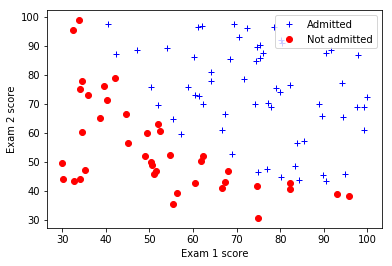

In [24]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1),'b+',label='Admitted')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc="upper right")
plt.show()

### 3) 학습

In [25]:
from  sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='liblinear', C=10)
log_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
log_reg.predict([[30,70],
                [50,90]])

array([0, 1])

### 4) decision boundary

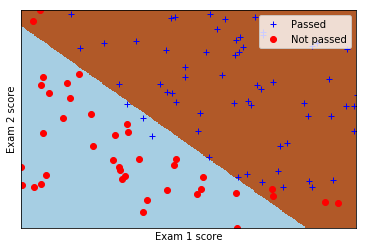

In [27]:
x_min, x_max= X[:,0].min(), X[:,0].max()
y_min, y_max= X[:,1].min(), X[:,1].max()
h=.2
xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=log_reg.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), '+b', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not passed')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 2. 로지스틱 회귀 + 정규화
- 1) 불량여부 데이터 읽기
- 2) 그래프 그리기
- 3) 학습
- 4) decision boundary

### 1) 불량여부 데이터 읽기

In [28]:
import numpy as np
import pandas as pd

data=pd.read_csv('qa.txt',names=['t1','t2','Passed'])
print data

X=np.c_[data['t1'],data['t2']] # 점수
y=data['Passed'] # 불량여부
m=len(data) #정보 개수

           t1        t2  Passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
5   -0.524770  0.209800       1
6   -0.398040  0.034357       1
7   -0.305880 -0.192250       1
8    0.016705 -0.404240       1
9    0.131910 -0.513890       1
10   0.385370 -0.565060       1
11   0.529380 -0.521200       1
12   0.638820 -0.243420       1
13   0.736750 -0.184940       1
14   0.546660  0.487570       1
15   0.322000  0.582600       1
16   0.166470  0.538740       1
17  -0.046659  0.816520       1
18  -0.173390  0.699560       1
19  -0.478690  0.633770       1
20  -0.605410  0.597220       1
21  -0.628460  0.334060       1
22  -0.593890  0.005117       1
23  -0.421080 -0.272660       1
24  -0.115780 -0.396930       1
25   0.201040 -0.601610       1
26   0.466010 -0.535820       1
27   0.673390 -0.535820       1
28  -0.138820  0.546050       1
29  -0.294350  0.779970       1
..      

In [29]:
print X.shape, y.shape

(118, 2) (118,)


### 2) 그래프 그리기

In [30]:
pos =[]
neg =[]

for (i,val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)
print pos
print neg

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


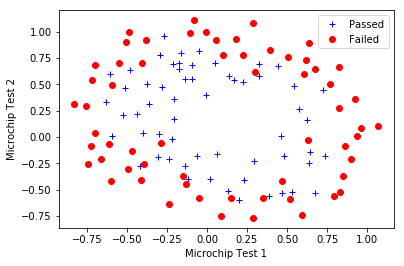

In [31]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1),'b+',label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Failed')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right")
plt.show()

### 3) 학습

In [32]:
from sklearn.preprocessing import PolynomialFeatures
degree=6
poly_features=PolynomialFeatures(degree=degree, include_bias=False)
X_poly=poly_features.fit_transform(X)

print X[0]
#print X_poly[0]
print X_poly[0].shape

[0.051267 0.69956 ]
(27,)


In [33]:
from  sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(penalty='l2',solver='liblinear', C=1e-1)
log_reg.fit(X_poly,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### 4) decision boundary

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


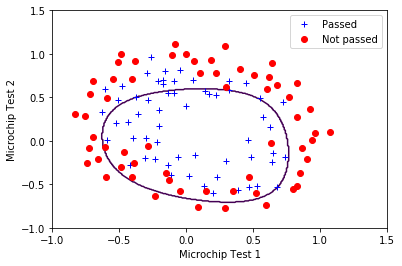

In [34]:
u=np.linspace(-1,1.5,300)
v=np.linspace(-1,1.5,300)
z=np.zeros((len(u), len(v)))

for i in range(len(u)):
    a=[]
    for j in range(len(v)):
        a.append(np.array([u[i], v[j]]))
    
    my_data=poly_features.fit_transform(a)
    z[i]=log_reg.predict(my_data)
    
plt.contour(u,v,z,0)
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), '+b', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not passed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')

plt.show()

### 5) 로지스틱 회귀의 성능 측정법

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0]
[[46 14]
 [16 42]]


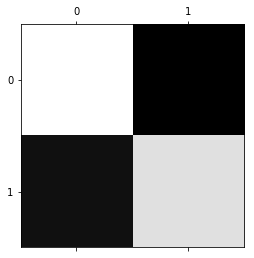

precision_score:  0.75
recall_score:  0.7241379310344828
F1_score:  0.736842105263158


In [36]:
#1. y값 prediction
y_pred=log_reg.predict(X_poly)
print y_pred

#2. confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y,y_pred)
print conf_mat
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

#3. precision & recall 
from sklearn.metrics import precision_score, recall_score
print "precision_score: ", precision_score(y,y_pred)
print "recall_score: ", recall_score(y,y_pred)

#4. F1 score
from sklearn.metrics import f1_score
print "F1_score: ", f1_score(y, y_pred)

In [39]:
#y probability
y_scores=log_reg.decision_function(X_poly)

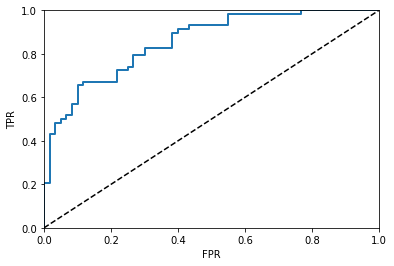

roc_auc_score:  0.8554597701149426


In [40]:
#5. ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr,tpr)
plt.show()

#6. AUC
from sklearn.metrics import roc_auc_score
print "roc_auc_score: ", roc_auc_score(y,y_scores)